# Just Convection and Radiation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation, FFMpegWriter

plt.clf()

nx, ny = 120, 120        # Grid size
Lx, Ly = 120, 120      # Domain size
dt = 0.02             # Time step
num_steps = 100      # Number of time steps
alpha = 0.08          # Thermal diffusivity
velocity = 4.0        # Fluid velocity
kappa = 0.005         #absorption coeff for radiation
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial conditions
T = np.zeros((nx, ny))  #Temp
for i in range(nx):
    for j in range(ny):
        if  0 <np.sqrt(i**2 + j**2) <60:
            T[i,j] = 1000*(np.random.rand()+1)
        elif 110>np.sqrt(i**2 + j**2)>=60: 
            T[i,j] = 500*(np.random.rand() +.5)
        #elif 110>np.sqrt(i**2 + j**2)>=80: 
          #  T[i,j] = 100
        else:
            T[i, j] = 0
#T[20:30, 0:50] = 1.0   
#T[30:40, 20:40] = 0.0   
T_c = np.zeros((nx, ny))
T_r = np.zeros((nx, ny))
#Tmid = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        if np.sqrt(i**2 + j**2) <=60:
            T_c[i, j]= T[i,j]
        elif 100> np.sqrt(i**2 + j**2) >=60:
            T_r[i, j]= T[i,j]
            
#print(np.shape(T_c), np.shape(T)) 


mixing_length = .02


# Constants for gravity
turbulent_viscosity = .25
g = 10  # gravitational acceleration
beta = .08  # Thermal expansion coefficient

filename_pattern = "conv_turb_frame_{:03d}.png"

fig, ax = plt.subplots()
def update_conv(num_steps):
    for step in range(num_steps):
        dT_c_dx = np.gradient(T_c[1:-1, 1:-1], axis=0)
        dT_c_dy = np.gradient(T_c[1:-1, 1:-1], axis=1)

        dT_r_dx = np.gradient(T_r[1:-1, 1:-1], axis=0)
        dT_r_dy = np.gradient(T_r[1:-1, 1:-1], axis=1)

        # Convective flux
        F_conv_top = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_c_dx + dT_c_dy)
        F_conv_bot = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_r_dx + dT_r_dy)
        # Grav Buoyancy
        F_b_c = beta * g * np.array(np.gradient(T_c[1:-1, 1:-1]))
        F_b_r = beta * g * np.array(np.gradient(T_r[1:-1, 1:-1]))

        turb_top = turbulent_viscosity * np.sqrt(np.gradient(T_c[1:-1, 1:-1])[0]**2 + np.gradient(T_c[1:-1, 1:-1])[1]**2)
        turb_bot = turbulent_viscosity * np.sqrt(np.gradient(T_r[1:-1, 1:-1])[0]**2 + np.gradient(T_r[1:-1, 1:-1])[1]**2)

        # Update temperature using the effects of turbulence
        T_c[1:-1, 1:-1] += alpha * dt * (
            (T_c[2:, 1:-1] - 2 * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
            (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
            velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
                        (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) #+ turb_top * dt + F_conv_top * dt + F_b_c[1] * dt

        T_r[1:-1, 1:-1] += alpha * dt * (
            (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
            (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) #+ turb_bot * dt + F_conv_bot * dt + F_b_r[1] * dt

    #     T_c[1:-1, 1:-1] += alpha * dt * (
    #         (T_c[2:, 1:-1] - 2*np.zeros((nx-2, ny-2)) * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
    #         (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
    #         velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
    #                     (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) - F_b_top[1] * dt

    #     T_r[1:-1, 1:-1] += alpha * dt * (
    #         (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
    #         (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) - F_b_bot[1] * dt

        T = T_c + T_r


        ax.clear()
        ax.imshow(T, cmap='hot', extent=[0, Lx, 0, Ly], origin='lower')
        
        
frame_filename = filename_pattern.format(num_steps)
plt.savefig(frame_filename, bbox_inches='tight')

# Create the animation
metadata = dict(title='Turbulent Convection Simulation', artist='Matplotlib', comment='Wakanda is coming.')
writer = FFMpegWriter(fps=10, metadata=metadata)
with writer.saving(fig, "star_noturb.mp4", dpi=200):
    for step in range(num_steps):
        update_conv(step)
        writer.grab_frame()

# With Mixing Length Turbulence only

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation, FFMpegWriter

plt.clf()

nx, ny = 120, 120        # Grid size
Lx, Ly = 120, 120      # Domain size
dt = 0.02             # Time step
num_steps = 100      # Number of time steps
alpha = 0.08          # Thermal diffusivity
velocity = 4.0        # Fluid velocity
kappa = 0.005         #absorption coeff for radiation
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial conditions
T = np.zeros((nx, ny))  #Temp
for i in range(nx):
    for j in range(ny):
        if  0 <np.sqrt(i**2 + j**2) <60:
            T[i,j] = 1000*(np.random.rand()+1)
        elif 110>np.sqrt(i**2 + j**2)>=60: 
            T[i,j] = 500*(np.random.rand() +.5)
        #elif 110>np.sqrt(i**2 + j**2)>=80: 
          #  T[i,j] = 100
        else:
            T[i, j] = 0
#T[20:30, 0:50] = 1.0   
#T[30:40, 20:40] = 0.0   
T_c = np.zeros((nx, ny))
T_r = np.zeros((nx, ny))
#Tmid = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        if np.sqrt(i**2 + j**2) <=60:
            T_c[i, j]= T[i,j]
        elif 100> np.sqrt(i**2 + j**2) >=60:
            T_r[i, j]= T[i,j]
            
#print(np.shape(T_c), np.shape(T)) 


mixing_length = .02


# Constants for gravity
turbulent_viscosity = .25
g = 10  # gravitational acceleration
beta = .08  # Thermal expansion coefficient

filename_pattern = "conv_turb_frame_{:03d}.png"

fig, ax = plt.subplots()
def update_conv(num_steps):
    for step in range(num_steps):
        dT_c_dx = np.gradient(T_c[1:-1, 1:-1], axis=0)
        dT_c_dy = np.gradient(T_c[1:-1, 1:-1], axis=1)

        dT_r_dx = np.gradient(T_r[1:-1, 1:-1], axis=0)
        dT_r_dy = np.gradient(T_r[1:-1, 1:-1], axis=1)

        # Convective flux w MLT
        F_conv_top = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_c_dx + dT_c_dy)
        F_conv_bot = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_r_dx + dT_r_dy)
        # Grav Buoyancy
        F_b_c = beta * g * np.array(np.gradient(T_c[1:-1, 1:-1]))
        F_b_r = beta * g * np.array(np.gradient(T_r[1:-1, 1:-1]))

        turb_top = turbulent_viscosity * np.sqrt(np.gradient(T_c[1:-1, 1:-1])[0]**2 + np.gradient(T_c[1:-1, 1:-1])[1]**2)
        turb_bot = turbulent_viscosity * np.sqrt(np.gradient(T_r[1:-1, 1:-1])[0]**2 + np.gradient(T_r[1:-1, 1:-1])[1]**2)

        # Update temperature using the effects of turbulence
        T_c[1:-1, 1:-1] += alpha * dt * (
            (T_c[2:, 1:-1] - 2 * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
            (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
            velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
                        (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) + F_conv_top * dt

        T_r[1:-1, 1:-1] += alpha * dt * (
            (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
            (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) + F_conv_bot * dt

    #     T_c[1:-1, 1:-1] += alpha * dt * (
    #         (T_c[2:, 1:-1] - 2*np.zeros((nx-2, ny-2)) * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
    #         (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
    #         velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
    #                     (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) - F_b_top[1] * dt

    #     T_r[1:-1, 1:-1] += alpha * dt * (
    #         (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
    #         (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) - F_b_bot[1] * dt

        T = T_c + T_r 


        ax.clear()
        ax.imshow(T, cmap='hot', extent=[0, Lx, 0, Ly], origin='lower')
        
        
frame_filename = filename_pattern.format(num_steps)
plt.savefig(frame_filename, bbox_inches='tight')

# Create the animation
metadata = dict(title='Turbulent Convection Simulation', artist='Matplotlib', comment='Wakanda is coming.')
writer = FFMpegWriter(fps=10, metadata=metadata)
with writer.saving(fig, "star_mlt.mp4", dpi=200):
    for step in range(num_steps):
        update_conv(step)
        writer.grab_frame()

# Gravitational Buoyancy Only

<Figure size 432x288 with 0 Axes>

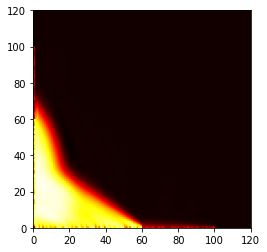

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation, FFMpegWriter

plt.clf()

nx, ny = 120, 120        # Grid size
Lx, Ly = 120, 120      # Domain size
dt = 0.02             # Time step
num_steps = 100      # Number of time steps
alpha = 0.08          # Thermal diffusivity
velocity = 4.0        # Fluid velocity
kappa = 0.005         #absorption coeff for radiation
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial conditions
T = np.zeros((nx, ny))  #Temp
for i in range(nx):
    for j in range(ny):
        if  0 <np.sqrt(i**2 + j**2) <60:
            T[i,j] = 1000*(np.random.rand()+1)
        elif 110>np.sqrt(i**2 + j**2)>=60: 
            T[i,j] = 500*(np.random.rand() +.5)
        #elif 110>np.sqrt(i**2 + j**2)>=80: 
          #  T[i,j] = 100
        else:
            T[i, j] = 0
#T[20:30, 0:50] = 1.0   
#T[30:40, 20:40] = 0.0   
T_c = np.zeros((nx, ny))
T_r = np.zeros((nx, ny))
#Tmid = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        if np.sqrt(i**2 + j**2) <=60:
            T_c[i, j]= T[i,j]
        elif 100> np.sqrt(i**2 + j**2) >=60:
            T_r[i, j]= T[i,j]
            
#print(np.shape(T_c), np.shape(T)) 


mixing_length = .02


# Constants for gravity
turbulent_viscosity = .25
g = 10  # gravitational acceleration
beta = .08  # Thermal expansion coefficient

filename_pattern = "conv_turb_frame_{:03d}.png"

fig, ax = plt.subplots()
def update_conv(num_steps):
    for step in range(num_steps):
        dT_c_dx = np.gradient(T_c[1:-1, 1:-1], axis=0)
        dT_c_dy = np.gradient(T_c[1:-1, 1:-1], axis=1)

        dT_r_dx = np.gradient(T_r[1:-1, 1:-1], axis=0)
        dT_r_dy = np.gradient(T_r[1:-1, 1:-1], axis=1)

        # Convective flux
        F_conv_top = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_c_dx + dT_c_dy)
        F_conv_bot = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_r_dx + dT_r_dy)
        # Grav Buoyancy
        F_b_c = beta * g * np.array(np.gradient(T_c[1:-1, 1:-1]))
        F_b_r = beta * g * np.array(np.gradient(T_r[1:-1, 1:-1]))

        turb_top = turbulent_viscosity * np.sqrt(np.gradient(T_c[1:-1, 1:-1])[0]**2 + np.gradient(T_c[1:-1, 1:-1])[1]**2)
        turb_bot = turbulent_viscosity * np.sqrt(np.gradient(T_r[1:-1, 1:-1])[0]**2 + np.gradient(T_r[1:-1, 1:-1])[1]**2)

        # Update temperature using the effects of turbulence
        T_c[1:-1, 1:-1] += alpha * dt * (
            (T_c[2:, 1:-1] - 2 * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
            (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
            velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
                        (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) + F_b_c[1] * dt

        T_r[1:-1, 1:-1] += alpha * dt * (
            (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
            (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) + F_b_r[1] * dt

    #     T_c[1:-1, 1:-1] += alpha * dt * (
    #         (T_c[2:, 1:-1] - 2*np.zeros((nx-2, ny-2)) * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
    #         (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
    #         velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
    #                     (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) - F_b_top[1] * dt

    #     T_r[1:-1, 1:-1] += alpha * dt * (
    #         (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
    #         (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) - F_b_bot[1] * dt

        T = T_c + T_r


        ax.clear()
        ax.imshow(T, cmap='hot', extent=[0, Lx, 0, Ly], origin='lower')
        
        
frame_filename = filename_pattern.format(num_steps)
plt.savefig(frame_filename, bbox_inches='tight')

# Create the animation
metadata = dict(title='Turbulent Convection Simulation', artist='Matplotlib', comment='Wakanda is coming.')
writer = FFMpegWriter(fps=10, metadata=metadata)
with writer.saving(fig, "star_grav.mp4", dpi=200):
    for step in range(num_steps):
        update_conv(step)
        writer.grab_frame()

# Simple Turbulence Only

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation, FFMpegWriter

plt.clf()

nx, ny = 120, 120        # Grid size
Lx, Ly = 120, 120      # Domain size
dt = 0.02             # Time step
num_steps = 100      # Number of time steps
alpha = 0.08          # Thermal diffusivity
velocity = 4.0        # Fluid velocity
kappa = 0.005         #absorption coeff for radiation
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial conditions
T = np.zeros((nx, ny))  #Temp
for i in range(nx):
    for j in range(ny):
        if  0 <np.sqrt(i**2 + j**2) <60:
            T[i,j] = 1000*(np.random.rand()+1)
        elif 110>np.sqrt(i**2 + j**2)>=60: 
            T[i,j] = 500*(np.random.rand() +.5)
        #elif 110>np.sqrt(i**2 + j**2)>=80: 
          #  T[i,j] = 100
        else:
            T[i, j] = 0
#T[20:30, 0:50] = 1.0   
#T[30:40, 20:40] = 0.0   
T_c = np.zeros((nx, ny))
T_r = np.zeros((nx, ny))
#Tmid = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        if np.sqrt(i**2 + j**2) <=60:
            T_c[i, j]= T[i,j]
        elif 100> np.sqrt(i**2 + j**2) >=60:
            T_r[i, j]= T[i,j]
            
#print(np.shape(T_c), np.shape(T)) 


mixing_length = .02


# Constants for gravity
turbulent_viscosity = .25
g = 10  # gravitational acceleration
beta = .08  # Thermal expansion coefficient

filename_pattern = "conv_turb_frame_{:03d}.png"

fig, ax = plt.subplots()
def update_conv(num_steps):
    for step in range(num_steps):
        dT_c_dx = np.gradient(T_c[1:-1, 1:-1], axis=0)
        dT_c_dy = np.gradient(T_c[1:-1, 1:-1], axis=1)

        dT_r_dx = np.gradient(T_r[1:-1, 1:-1], axis=0)
        dT_r_dy = np.gradient(T_r[1:-1, 1:-1], axis=1)

        # Convective flux
        F_conv_top = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_c_dx + dT_c_dy)
        F_conv_bot = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_r_dx + dT_r_dy)
        # Grav Buoyancy
        F_b_c = beta * g * np.array(np.gradient(T_c[1:-1, 1:-1]))
        F_b_r = beta * g * np.array(np.gradient(T_r[1:-1, 1:-1]))

        turb_c = turbulent_viscosity * np.sqrt(np.gradient(T_c[1:-1, 1:-1])[0]**2 + np.gradient(T_c[1:-1, 1:-1])[1]**2)
        turb_r = turbulent_viscosity * np.sqrt(np.gradient(T_r[1:-1, 1:-1])[0]**2 + np.gradient(T_r[1:-1, 1:-1])[1]**2)

        # Update temperature using the effects of turbulence
        T_c[1:-1, 1:-1] += alpha * dt * (
            (T_c[2:, 1:-1] - 2 * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
            (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
            velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
                        (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) + turb_c * dt #+ F_conv_top * dt + F_b_c[1] * dt

        T_r[1:-1, 1:-1] += alpha * dt * (
            (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
            (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) + turb_r * dt #+ F_conv_bot * dt + F_b_r[1] * dt

    #     T_c[1:-1, 1:-1] += alpha * dt * (
    #         (T_c[2:, 1:-1] - 2*np.zeros((nx-2, ny-2)) * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
    #         (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
    #         velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
    #                     (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) - F_b_top[1] * dt

    #     T_r[1:-1, 1:-1] += alpha * dt * (
    #         (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
    #         (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) - F_b_bot[1] * dt

        T = T_c + T_r 


        ax.clear()
        ax.imshow(T, cmap='hot', extent=[0, Lx, 0, Ly], origin='lower')
        
        
frame_filename = filename_pattern.format(num_steps)
plt.savefig(frame_filename, bbox_inches='tight')

# Create the animation
metadata = dict(title='Turbulent Convection Simulation', artist='Matplotlib', comment='Wakanda is coming.')
writer = FFMpegWriter(fps=10, metadata=metadata)
with writer.saving(fig, "star_simp.mp4", dpi=200):
    for step in range(num_steps):
        update_conv(step)
        writer.grab_frame()

<Figure size 432x288 with 0 Axes>

# All Turbulence

<Figure size 432x288 with 0 Axes>

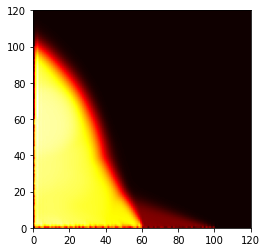

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation, FFMpegWriter

plt.clf()

nx, ny = 120, 120        # Grid size
Lx, Ly = 120, 120      # Domain size
dt = 0.02             # Time step
num_steps = 100      # Number of time steps
alpha = 0.08          # Thermal diffusivity
velocity = 4.0        # Fluid velocity
kappa = 0.005         #absorption coeff for radiation
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial conditions
T = np.zeros((nx, ny))  #Temp
for i in range(nx):
    for j in range(ny):
        if  0 <np.sqrt(i**2 + j**2) <60:
            T[i,j] = 1000*(np.random.rand()+1)
        elif 110>np.sqrt(i**2 + j**2)>=60: 
            T[i,j] = 500*(np.random.rand() +.5)
        #elif 110>np.sqrt(i**2 + j**2)>=80: 
          #  T[i,j] = 100
        else:
            T[i, j] = 0
#T[20:30, 0:50] = 1.0   
#T[30:40, 20:40] = 0.0   
T_c = np.zeros((nx, ny))
T_r = np.zeros((nx, ny))
#Tmid = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        if np.sqrt(i**2 + j**2) <=60:
            T_c[i, j]= T[i,j]
        elif 100> np.sqrt(i**2 + j**2) >=60:
            T_r[i, j]= T[i,j]
            
#print(np.shape(T_c), np.shape(T)) 


mixing_length = .02


# Constants for gravity
turbulent_viscosity = .25
g = 10  # gravitational acceleration
beta = .08  # Thermal expansion coefficient

filename_pattern = "conv_turb_frame_{:03d}.png"

fig, ax = plt.subplots()
def update_conv(num_steps):
    for step in range(num_steps):
        dT_c_dx = np.gradient(T_c[1:-1, 1:-1], axis=0)
        dT_c_dy = np.gradient(T_c[1:-1, 1:-1], axis=1)

        dT_r_dx = np.gradient(T_r[1:-1, 1:-1], axis=0)
        dT_r_dy = np.gradient(T_r[1:-1, 1:-1], axis=1)

        # Convective flux
        F_conv_top = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_c_dx + dT_c_dy)
        F_conv_bot = -4 / 3 * alpha * mixing_length * np.sqrt(g) * (dT_r_dx + dT_r_dy)
        # Grav Buoyancy
        F_b_c = beta * g * np.array(np.gradient(T_c[1:-1, 1:-1]))
        F_b_r = beta * g * np.array(np.gradient(T_r[1:-1, 1:-1]))

        turb_top = turbulent_viscosity * np.sqrt(np.gradient(T_c[1:-1, 1:-1])[0]**2 + np.gradient(T_c[1:-1, 1:-1])[1]**2)
        turb_bot = turbulent_viscosity * np.sqrt(np.gradient(T_r[1:-1, 1:-1])[0]**2 + np.gradient(T_r[1:-1, 1:-1])[1]**2)

        # Update temperature using the effects of turbulence
        T_c[1:-1, 1:-1] += alpha * dt * (
            (T_c[2:, 1:-1] - 2 * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
            (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
            velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
                        (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) + turb_top * dt + F_conv_top * dt + F_b_c[1] * dt

        T_r[1:-1, 1:-1] += alpha * dt * (
            (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
            (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) + turb_bot * dt + F_conv_bot * dt + F_b_r[1] * dt

    #     T_c[1:-1, 1:-1] += alpha * dt * (
    #         (T_c[2:, 1:-1] - 2*np.zeros((nx-2, ny-2)) * T_c[1:-1, 1:-1] + T_c[:-2, 1:-1]) / (dx**2) +
    #         (T_c[1:-1, 2:] - 2 * T_c[1:-1, 1:-1] + T_c[1:-1, :-2]) / (dy**2) -
    #         velocity * ((T_c[1:-1, 2:] - T_c[1:-1, :-2]) / (2 * dx) +
    #                     (T_c[2:, 1:-1] - T_c[:-2, 1:-1]) / (2 * dy))) - F_b_top[1] * dt

    #     T_r[1:-1, 1:-1] += alpha * dt * (
    #         (T_r[2:, 1:-1] - 2 * T_r[1:-1, 1:-1] + T_r[:-2, 1:-1]) / (dx**2) +
    #         (T_r[1:-1, 2:] - 2 * T_r[1:-1, 1:-1] + T_r[1:-1, :-2]) / (dy**2)) - F_b_bot[1] * dt

        T = T_c + T_r 


        ax.clear()
        ax.imshow(T, cmap='hot', extent=[0, Lx, 0, Ly], origin='lower')
        
        
frame_filename = filename_pattern.format(num_steps)
plt.savefig(frame_filename, bbox_inches='tight')

# Create the animation
metadata = dict(title='Turbulent Convection Simulation', artist='Matplotlib', comment='Wakanda is coming.')
writer = FFMpegWriter(fps=10, metadata=metadata)
with writer.saving(fig, "star_all.mp4", dpi=200):
    for step in range(num_steps):
        update_conv(step)
        writer.grab_frame()